# **Project 3**, APS1070 Winter 2022
#### **PCA [14 marks]**
**Deadline: March 11th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Haocheng Wei
*   **Student number**: 1008498261



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [65]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

### Step 1

In [66]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='darkgrid')
sns.set_context('paper')
def x_dates(start='1 22 2020', periods=733):
    # generate a date time series, to replace the columns in given df (its uncompatible in seaborn)
    return pd.date_range(start, periods=periods, freq='D')

def plotSeries(df, cols, ylabel='Cases', titles=None):
    # main function used in question 1
    if not titles:
        titles = cols
    fig = plt.figure(figsize=(10, 4 * len(cols)))
    axes = fig.subplots(len(cols), 1)
    for i in range(len(cols)):
        sns.lineplot(y=df.loc[cols[i]], x=x_dates(), ax=axes[i])
        axes[i].set(title=titles[i], ylabel='Cases')

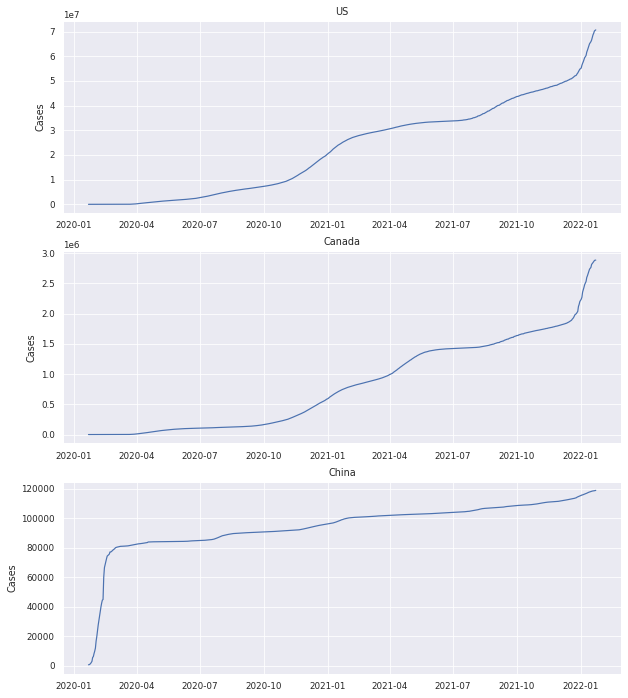

In [67]:
plotSeries(cases_raw, ['US', 'Canada', 'China'])

### Step 2

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cases_raw)                                         # fit scaler
cases_scaled = scaler.transform(cases_raw)                                       # standarize data
cases_scaled = pd.DataFrame(data=cases_scaled, index=cases_raw.index, columns=cases_raw.columns)
cases_scaled.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,1.166867e-16,7.604461e-17,2.210533e-16,7.930164e-17,1.190941e-16,-7.887681e-17,6.075072e-17,3.285354e-17,8.354995e-17,1.505315e-16,...,1.472745e-17,-4.375751e-17,-2.903007e-17,-3.002134e-17,-1.316974e-17,-2.435693e-17,6.938894e-18,-4.545684e-17,-3.271193e-17,4.503201e-17
std,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,...,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00,1.002561e+00
min,-7.279097e-02,-7.295250e-02,-7.325203e-02,-7.304336e-02,-7.310169e-02,-7.286157e-02,-7.251253e-02,-7.255703e-02,-7.244224e-02,-7.252900e-02,...,-2.815905e-01,-2.818515e-01,-2.817487e-01,-2.816525e-01,-2.809429e-01,-2.808446e-01,-2.810697e-01,-2.809797e-01,-2.814619e-01,-2.820666e-01
25%,-7.279097e-02,-7.295250e-02,-7.325203e-02,-7.304336e-02,-7.310169e-02,-7.286157e-02,-7.251253e-02,-7.255703e-02,-7.244224e-02,-7.252900e-02,...,-2.765779e-01,-2.768569e-01,-2.767769e-01,-2.767163e-01,-2.760618e-01,-2.760173e-01,-2.760673e-01,-2.760075e-01,-2.765126e-01,-2.771132e-01
50%,-7.279097e-02,-7.295250e-02,-7.325203e-02,-7.304336e-02,-7.310169e-02,-7.286157e-02,-7.251253e-02,-7.255703e-02,-7.244224e-02,-7.252900e-02,...,-2.431898e-01,-2.436564e-01,-2.437277e-01,-2.436660e-01,-2.432417e-01,-2.433361e-01,-2.436151e-01,-2.438092e-01,-2.441879e-01,-2.446077e-01
75%,-7.279097e-02,-7.295250e-02,-7.325203e-02,-7.304336e-02,-7.310169e-02,-7.286157e-02,-7.251253e-02,-7.255703e-02,-7.244224e-02,-7.252900e-02,...,-1.134318e-01,-1.139486e-01,-1.141418e-01,-1.148873e-01,-1.154783e-01,-1.167874e-01,-1.179558e-01,-1.189926e-01,-1.195987e-01,-1.199538e-01
max,1.396371e+01,1.396378e+01,1.396374e+01,1.396391e+01,1.396394e+01,1.396406e+01,1.396413e+01,1.396414e+01,1.396416e+01,1.396415e+01,...,1.080869e+01,1.080335e+01,1.080678e+01,1.082181e+01,1.085364e+01,1.087180e+01,1.086769e+01,1.087919e+01,1.085755e+01,1.085140e+01


### Step 3

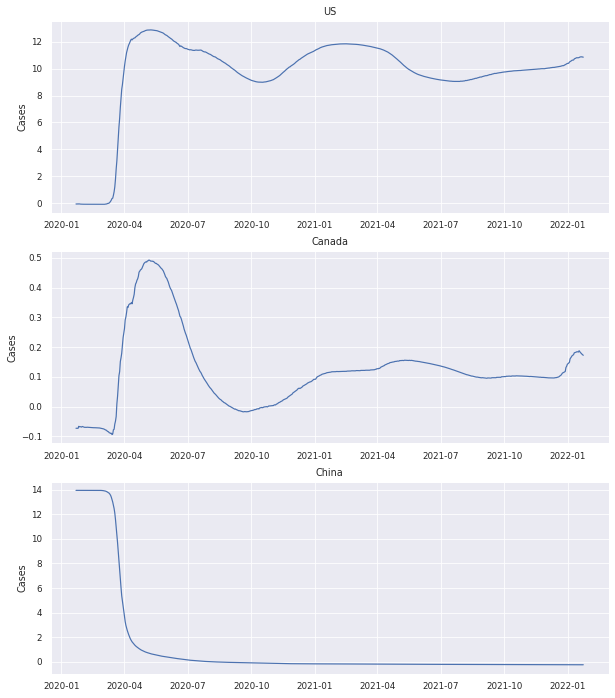

In [69]:
plotSeries(cases_scaled, ['US', 'Canada', 'China'])

### Step 4 Discussion
* The **curve going up** means that the country (region)'s total cases are growing at a higher rate than the average growing among all the world. Likely, the curve going down means that the cases are growing slower than the average.

* The **positive value** of the scaled data means that the total cases of a country is larger than the average among all the world.

* The covid cases are surely not negative. Its the scaler that make the smaller cases at each day negative in scaled data.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

### Step 1-2

In [70]:
def get_sorted_eigen(df_cov):
    # given cov matrix, return eigenvalue and eigenmatrix 
    w, v = np.linalg.eigh(df_cov)
    args = (-w).argsort()                                                        # sort descending
    return w[args], v.T[args]

cov = np.cov(cases_scaled.T)
w, v = get_sorted_eigen(cov)
print(cov.shape, w.shape, v.shape)

(733, 733) (733,) (733, 733)


### Step 3-4

In [71]:
wsum = sum(w)
ev = np.array([i / wsum * 100 for i in w])                                       # explained variances
cev = np.cumsum(ev)                                                              # cumulative explained variances
print(ev.shape, cev.shape)

(733,) (733,)


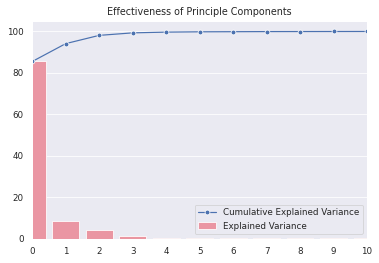

In [72]:
xticks = np.arange(0, 733)
sns.barplot(x=xticks, y=ev, label='Explained Variance')
sns.lineplot(x=xticks, y=cev, label='Cumulative Explained Variance', ci=None, marker='o')
plt.legend()
plt.title('Effectiveness of Principle Components')
plt.xlim(0, 10)
plt.show()

In [73]:
print('{} PCs needed to cover 98% of the dataset\'s variance'
    .format(np.where(cev>98)[0][0] + 1))

3 PCs needed to cover 98% of the dataset's variance


### Step 5-6

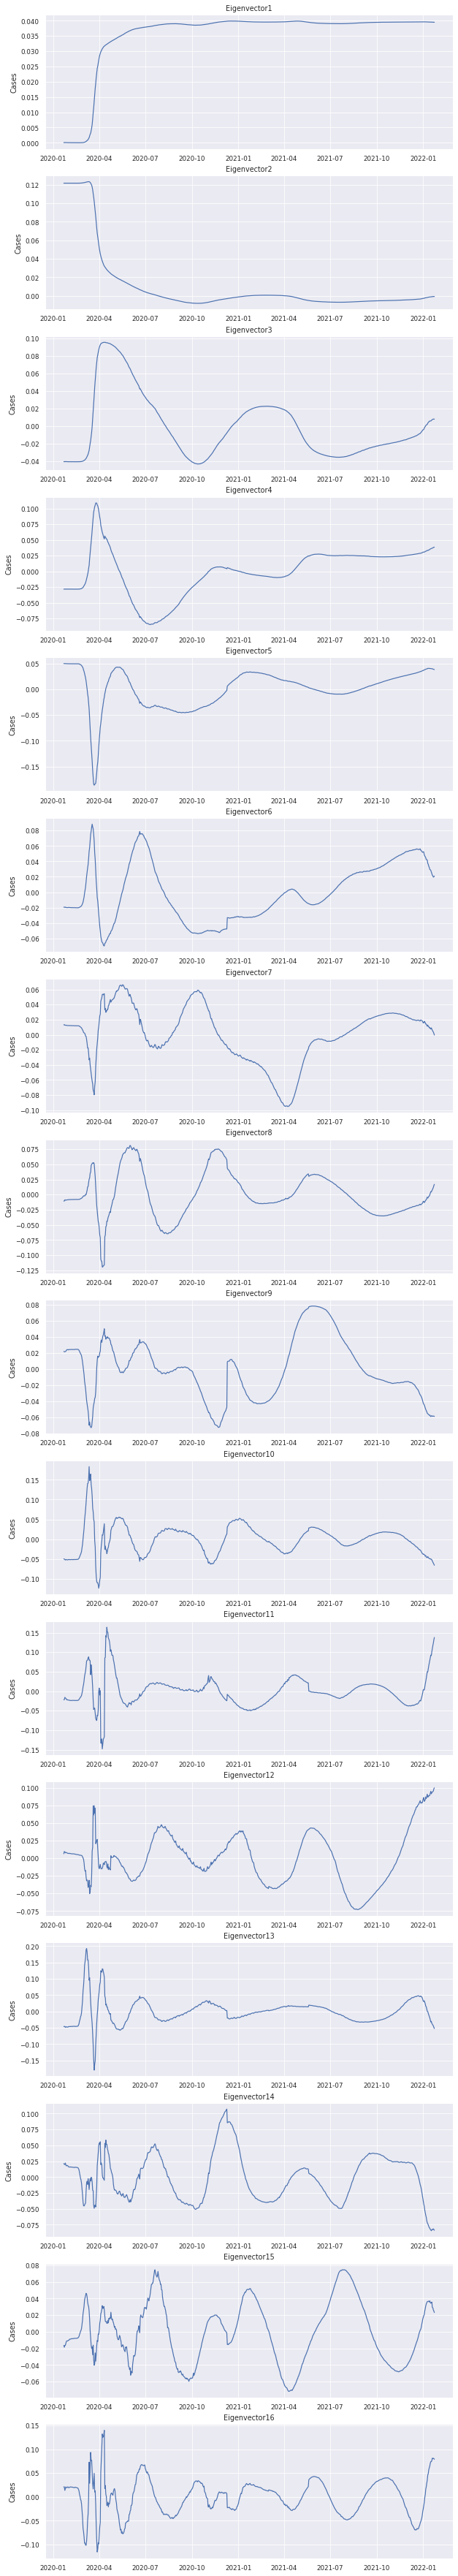

In [74]:
eigvec_df = pd.DataFrame(data=v[0:16])
titles = ['Eigenvector' + str(i + 1) for i in range(16)]
plotSeries(eigvec_df, cols=np.arange(16), ylabel='Value', titles=titles)

We can see from the graph above that:
* compared to the other eigenvectors, the first few series contain less peaks and valleys. The first and second eigenvector are almost monotonic. This indicates they captured the most significant patterns.

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


### Function

In [75]:
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import TruncatedSVD as svd

def get_reconstruction(df, pc, scaler=None, method='EVD'):
    # given data and its eigenvectors, return the reconstructed original data.
    if method == 'EVD':
        proj = np.dot(df, pc.T)                                                  # projection
        recon = np.dot(proj, pc)                                                 # reconstruction

    elif method == 'SVD':
        model = svd(n_components=pc.shape[0]).fit(df)
        t = model.transform(df)
        recon = model.inverse_transform(t)

    if scaler is not None:
        recon = scaler.inverse_transform(recon)                                  # inverse scale
    return pd.DataFrame(data=recon, index=df.index, columns=df.columns)

def plot4Figures(original_df, country_name, m='EVD'):
    # 1. plot the original series
    fig = plt.figure(figsize=(8 * 2, 5 * 2))
    ax = fig.subplots(2, 2)
    pctitles = ['only PC1', 'PC1 and PC2', 'PC1 - PC4', 'PC1 - PC8', 'PC1 - PC16', 'Original']

    sns.lineplot(y=original_df.loc[country_name], x=x_dates(), ax=ax[0][0])
    ax[0][0].set(ylabel='Cases', title='Original data of ' + country_name)

    # 2. plot the reconstructed series
    scaler = StandardScaler().fit(original_df)                                   # train scaler data
    df_scaled = scaler.transform(original_df)                                    # scale data                                 
    df_scaled = pd.DataFrame(data=df_scaled, index=cases_raw.index, columns=cases_raw.columns)

    cov = np.cov(df_scaled.T)    
    _, v = get_sorted_eigen(cov)                                                 # compute eigenvectors

    pc, recs, recerr = [1, 2, 4, 8, 16], [], []
    for i in range(len(pc)):
        g = np.arange(pc[i])                                                     # define vectors to use
        recs.append(
            get_reconstruction(df_scaled, v[g], scaler=scaler, method=m).loc[country_name])
    recs = np.array(recs)

    orgn = original_df.loc[country_name].to_numpy().reshape(1, 733)
    data = np.concatenate((recs, orgn))                                          # insert original data into the frame
    data = pd.DataFrame(data.T, x_dates(), columns=pctitles)
    sns.lineplot(data=data, palette='colorblind', ax=ax[1][0], dashes=False, linewidth=1)
    title='Reconstructions of Original data'
    if m=='SVD':
        title += ' using SVD'
    ax[1][0].set(title=title, ylabel='Cases')
    fig.show()

    ## 3. plot residual error of the best model
        ## Here I use argmin(RMSE) to evaluate models.
    
    # err = np.array([sum(rec - orgn.squeeze()) for rec in recs])
    err = np.array([sqrt(mse(rec, orgn.squeeze())) for rec in recs])
    best = np.argmin(err)                                                        # find min recerr
    sns.lineplot(y=recs[best]-orgn.squeeze(), x=x_dates(), ax=ax[0][1])
    ax[0][1].set(title='Residual Error of {} Using {}'.format(country_name, pctitles[best]), ylabel='Res Error')


    ## 4. plot RMSE
    rmse = []
    for i in range(100):
        g = np.arange(i + 1)
        rec = get_reconstruction(df_scaled, v[g], scaler=scaler, method=m).loc[country_name]
        rmse.append(sqrt(mse(rec, orgn.squeeze())))               # calculate rmse
    sns.lineplot(y=rmse, x=np.arange(100), ax=ax[1][1])
    ax[1][1].set(title='Reconstruct RMSE vs. number of Principle Components in log scale', yscale='log', xlabel='num of components', ylabel='RMSE')
    return

### US

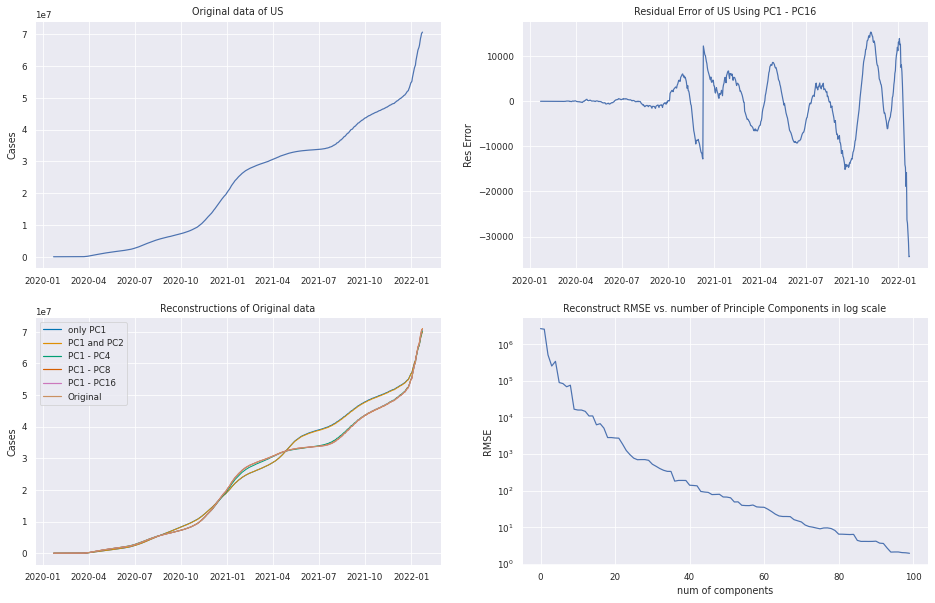

In [76]:
plot4Figures(cases_raw, 'US')

### Canada

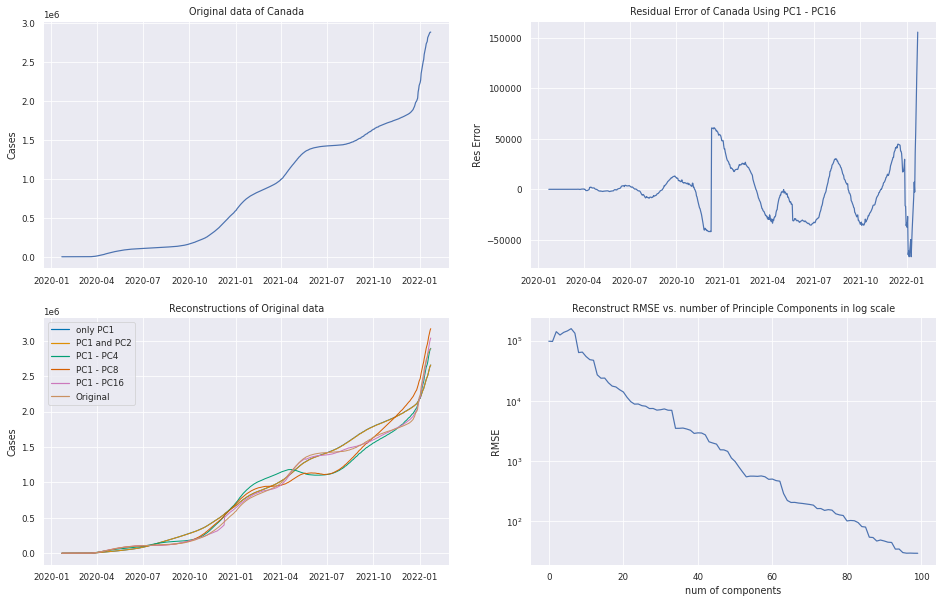

In [77]:
plot4Figures(cases_raw, 'Canada')

### China

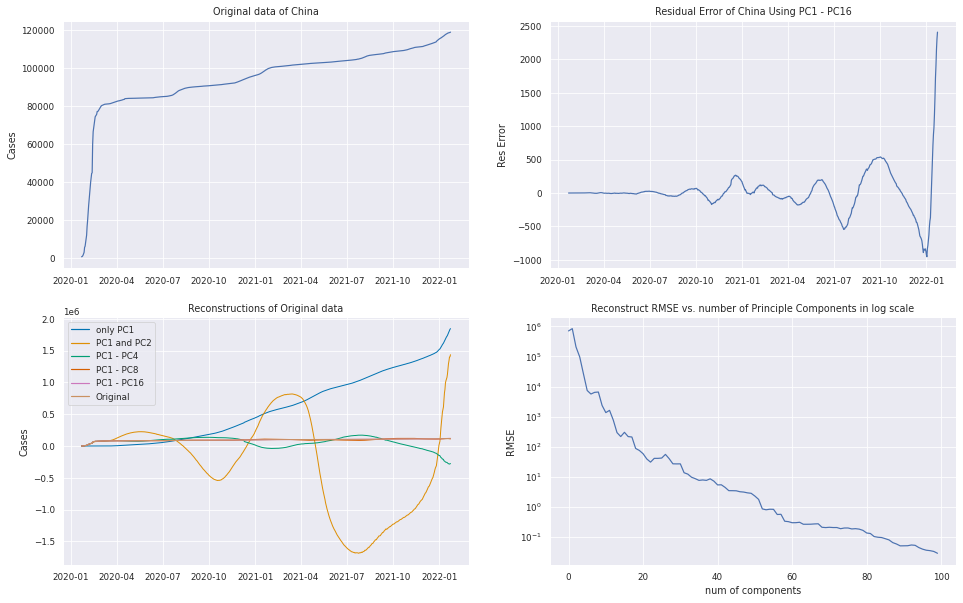

In [78]:
plot4Figures(cases_raw, 'China')

# Part 4: SVD [3 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.**[1]**


Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
### PLEASE REFER TO PART 3 FOR THE INTEGRATED FUNCTION ###

### US

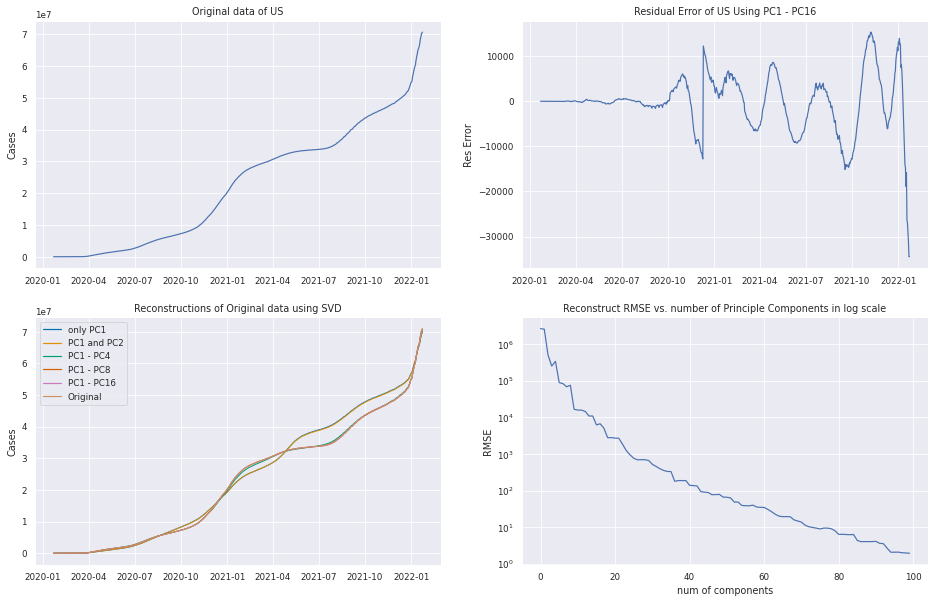

In [79]:
plot4Figures(cases_raw, 'US', m='SVD')

### Canada

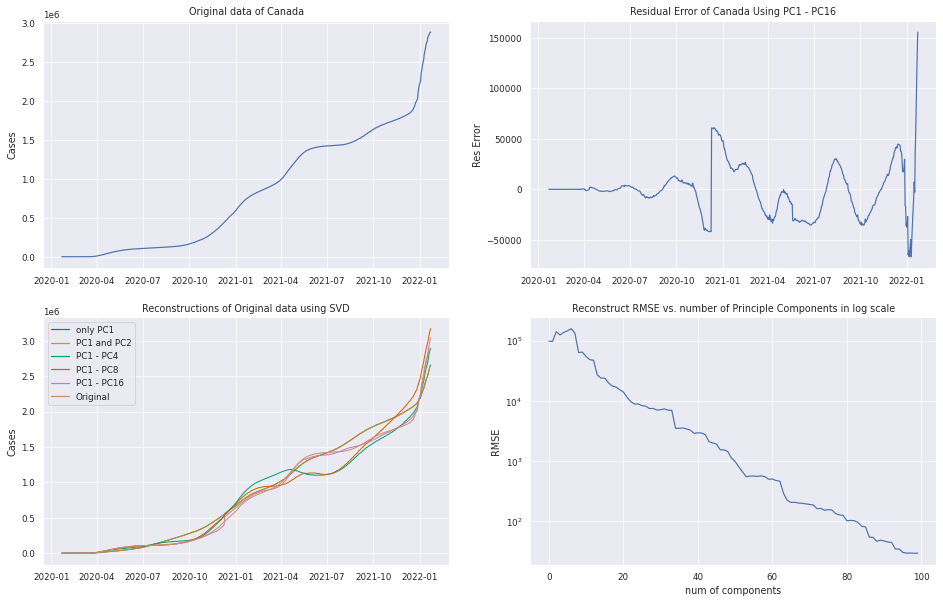

In [80]:
plot4Figures(cases_raw, 'Canada', m='SVD')

### China

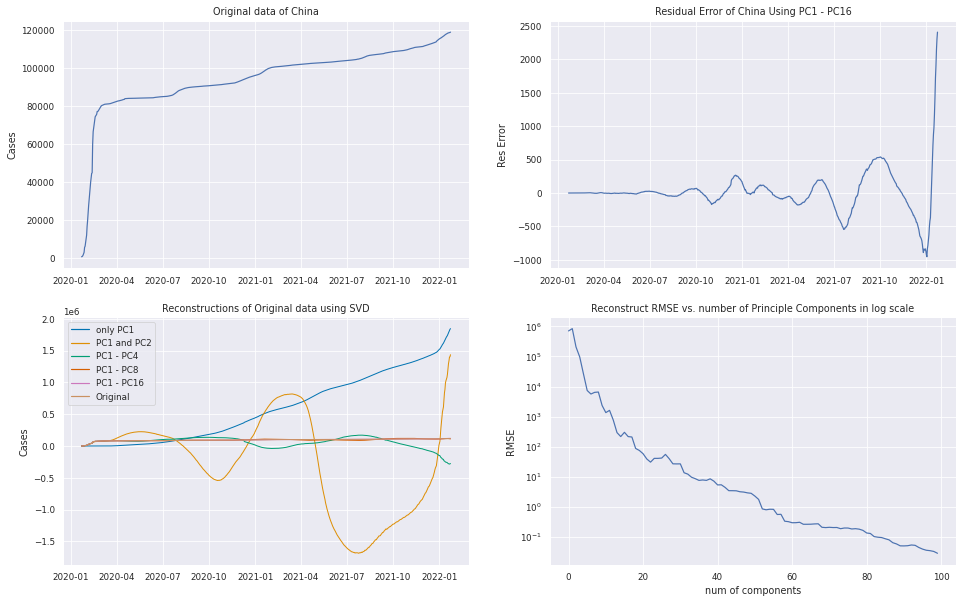

In [81]:
plot4Figures(cases_raw, 'China', m='SVD')

### Analysis

There's no significant difference between SVD and PCA applied on this dataset. Their result are graphically equivalent. With the increase on number of components, the RMSE between reconstructed series and original series decreases in log scale. The SVD method seems to work slower than PCA on above combinations. Both of them works well on the data of the U.S. and Canada with few components but theres negative cases on the data of China when the number of components are few.



### Discussion

Standarization and computation of covariance matrix is not required using SVD. Standarization is a prerequisite to covariance, and there is no covariance needed in SVD. But standarization is still a good way to preprocess the data before using SVD because it helps rescaling and centering the data.

# Part 5: Fashion-MNIST dataset [3 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.25]**
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

### Preprocess codes

In [82]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [83]:
x.shape

(1000, 784)

Label is: Ankle boot


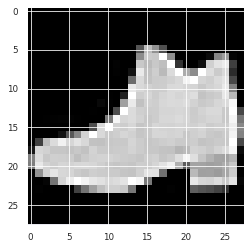

In [84]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

### Step 1-3

Discuss: Why it is better to choose items that are similar in shape?

I think it is mainly because the PCA can get more significant pattern in it's first few eigenvectors in this case. Therefore it can better reduct the dimensions of the input data.

In [85]:
# Selecting images from only three categories
if isinstance(y, pd.Series):
    y = y.to_numpy()
y = np.asarray(y, int)  # get rid of this strange categorial type
tmp = np.hstack([np.where(y==0), np.where(y==3), np.where(y==6)]).squeeze()  # top, dress, shirt
tmp.sort()
x_in3 = x.loc[tmp].to_numpy()
y_in3 = y[tmp]

In [86]:
u, s, vh = np.linalg.svd(x_in3)
u.shape, s.shape, vh.shape

((299, 299), (299,), (784, 784))

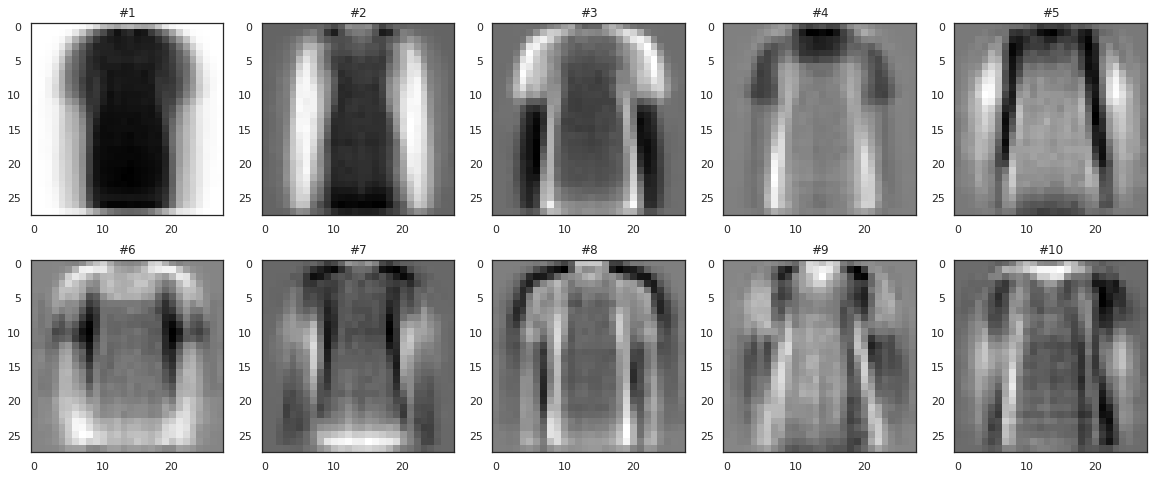

In [87]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style='white')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(vh[i, :].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

### Step 4

In [88]:

def plotRandomRec(data, n, seed=42):
    # np.random.seed(seed)
    idx = np.random.randint(0, data.shape[0])
    # u, s, vh = np.linalg.svd(x_in3)
    model = svd(n_components=n).fit(data)
    t = model.transform(data)
    recon = model.inverse_transform(t)
    fig = plt.figure(figsize=(4, 2))
    sns.set_theme(style='white')
    plt.subplot(1, 2, 1)
    plt.imshow(data[idx].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(recon[idx].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('Reconstructed')

### Step 5

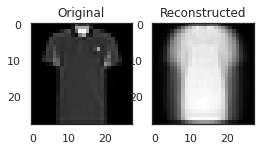

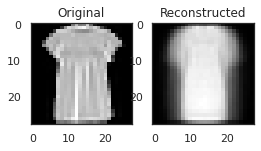

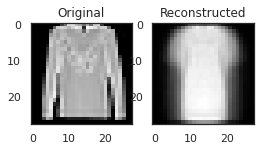

In [89]:
for i in range(3):
    plotRandomRec(x_in3, 1)

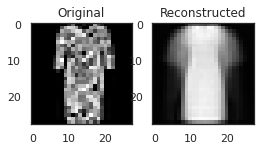

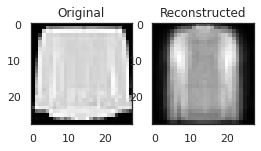

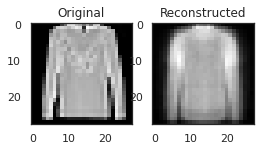

In [90]:
for i in range(3):
    plotRandomRec(x_in3, 4)

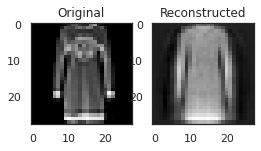

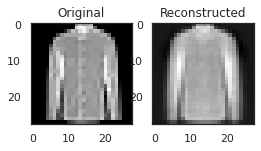

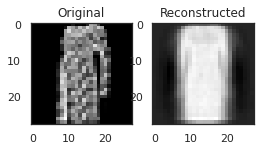

In [91]:
for i in range(3):
    plotRandomRec(x_in3, 8)

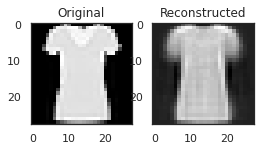

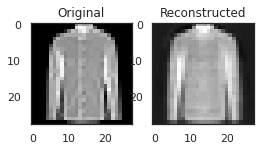

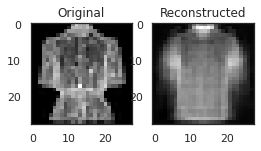

In [92]:
for i in range(3):
    plotRandomRec(x_in3, 16)

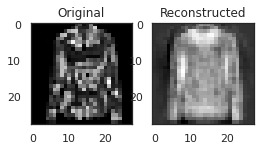

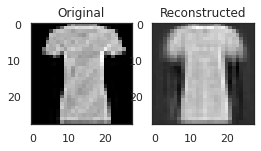

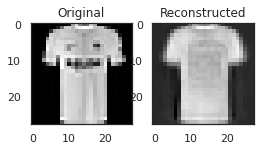

In [93]:
for i in range(3):
    plotRandomRec(x_in3, 28)

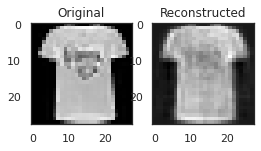

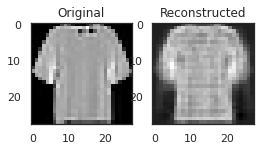

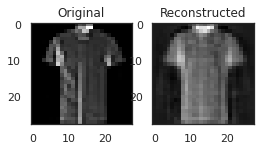

In [94]:
for i in range(3):
    plotRandomRec(x_in3, 40)

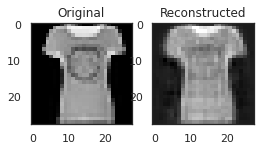

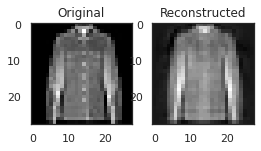

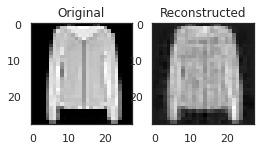

In [95]:
for i in range(3):
    plotRandomRec(x_in3, 64)

### Discussion and step 6

According to the experiments above, the number of components is somewhat **between 28 and 40** that humans can gradually identify the category of the image.

Lets assume that the number of components is 32.

In [96]:
original_size = x.shape[0] * x.shape[1]
component_size = 32 * x.shape[1]
proj_size = 32 * x.shape[0]
compress_ratio = (component_size + proj_size) / original_size
print("The compress ratio at n=32 is {}".format(compress_ratio))

The compress ratio at n=32 is 0.07281632653061225


Actually, we can plot the compress_ratio vs. num of components as a lineplot:

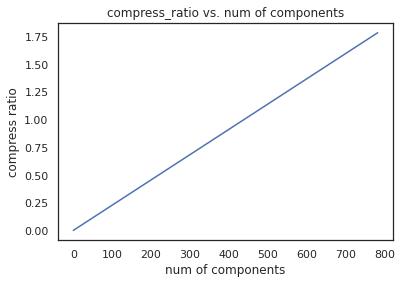

In [97]:
compratio = []
original_size = x.shape[0] * x.shape[1]
for i in range(x.shape[1]):
    component_size = (i + 1) * x.shape[1]
    proj_size = (i + 1) * x.shape[0]
    compratio.append((component_size + proj_size) / original_size)
sns.lineplot(y=compratio, x=np.arange(len(compratio)))
sns.set_theme(style='darkgrid')
plt.title('compress_ratio vs. num of components')
plt.xlabel('num of components')
plt.ylabel('compress ratio')
plt.show()

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

